###  <b>Problem statement</b>

Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'D:\Domain Analytics module\Capstone project\Ecom_CRM_analysis.csv',encoding='ISO-8859-1')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Exploratory Data Analysis

In [8]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.nunique() #Checking unique no. of values in each column

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [10]:
print(df.isnull().sum()) #Checking number of null values in each column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [11]:
df.dtypes #Checking data types

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
# Checking numerical features
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# Checking catgeorical features
df.describe(include=['object'])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


<ul>
    <li>The most frequently occuring Description is 'WHITE HANGING HEART T-LIGHT HOLDER'</li>
    <li>Customers are majorly from United Kingdom</li>
    <li>The mean quantity purchased is 9.55 while mean unit price of the items are 4.61</li>
    </ul>

In [18]:
df.duplicated().sum() #Checking number of duplicates

5268

## Data cleaning and processing

In [15]:
df1 = df.copy()

#### We will drop duplicates and keep only the last instance

In [16]:
df1 = df1.drop_duplicates(keep='last')

In [17]:
df1.duplicated().sum() #Now there are no duplicates present

0

#### Imputing 'Description' column based on Unit price of a product

In [19]:
df1['Description'] = df1.groupby('UnitPrice')['Description'].transform(
                     lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [20]:
print(df1.isnull().sum()) #Checking number of null values in each column

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [23]:
# Dropping rows where 'CustomerID' has null values

df1 = df1.dropna(subset=['CustomerID'])

In [24]:
print(df1.isnull().sum()) #Now there are no missing values in the data

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


#### Changing data type of InvoiceDate column

In [26]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'], errors='coerce')

C:\Users\VIRAJ\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [27]:
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

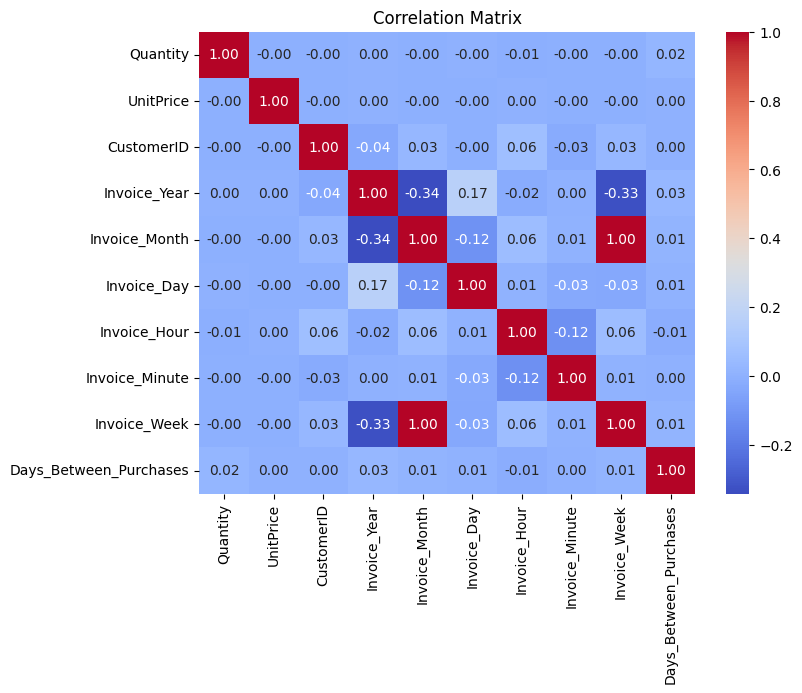

In [81]:
correlation_matrix = df1.corr()
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt ='.2f')
plt.title("Correlation Matrix")
plt.show()

#### Checking number of Invoices which got cancelled

In [33]:
can_invoice = df['InvoiceNo'].str.contains('C')
can_invoice.value_counts()

False    532621
True       9288
Name: InvoiceNo, dtype: int64

There are 9288 invoices which has status as cancellation

#### Checking number of return transactions

In [35]:
def return_trans(num):
    if num < 0:
        return 'Return Transaction'
    else:
        return 'Purchase Transaction'

In [36]:
df1['TransactionType'] = df1['Quantity'].apply(return_trans)

In [37]:
df1['TransactionType'].value_counts()

Purchase Transaction    392732
Return Transaction        8872
Name: TransactionType, dtype: int64

In [40]:
df1['TransactionType'].value_counts(normalize=True)*100

Purchase Transaction    97.790859
Return Transaction       2.209141
Name: TransactionType, dtype: float64

There are total of 8872 Return transactions which indicates 2.2% of the total transactions

#### Checking number of free items in all transactions

In [41]:
def free_item(num1):
    if num1 == 0:
        return 'Yes'
    else:
        return 'No'

In [42]:
df1['Is_FreeItem'] = df1['UnitPrice'].apply(free_item)

In [43]:
df1['Is_FreeItem'].value_counts()

No     401564
Yes        40
Name: Is_FreeItem, dtype: int64

In [45]:
df1['Is_FreeItem'].value_counts(normalize=True)*100

No     99.99004
Yes     0.00996
Name: Is_FreeItem, dtype: float64

## Feature Engineering

#### Extracting year, month, day, hour, and minute into separate columns

In [50]:
df1['Invoice_Year'] = df1['InvoiceDate'].dt.year
df1['Invoice_Month'] = df1['InvoiceDate'].dt.month
df1['Invoice_Day'] = df1['InvoiceDate'].dt.day
df1['Invoice_Hour'] = df1['InvoiceDate'].dt.hour
df1['Invoice_Minute'] = df1['InvoiceDate'].dt.minute
df1['Invoice_Week'] = df1['InvoiceDate'].dt.isocalendar().week
df1['Invoice_DayName'] = df1['InvoiceDate'].dt.day_name()

In [51]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,Invoice_Minute,TransactionType,Is_FreeItem,Invoice_Week,Invoice_DayName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,Purchase Transaction,No,48,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,Purchase Transaction,No,48,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,Purchase Transaction,No,48,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,Purchase Transaction,No,48,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,Purchase Transaction,No,48,Wednesday


In [52]:
df1['Invoice_DayName'].value_counts()

Thursday     81575
Wednesday    69753
Tuesday      67376
Monday       65715
Sunday       61673
Friday       55512
Name: Invoice_DayName, dtype: int64

From above we can see there are no transactions happening on Saturday. The number of transactions are highest on Thursday.

In [53]:
df1['Invoice_Month'].value_counts()

11    64232
10    49928
12    43736
9     40459
5     28661
6     27576
3     27516
8     27444
7     27256
4     22988
1     21670
2     20138
Name: Invoice_Month, dtype: int64

The number of transactions are highest during last Quarter which is the highest in the year November, followed by October.

In [54]:
df1['Invoice_Hour'].value_counts()

12    72213
13    64051
14    54194
11    49525
15    45641
10    38725
16    24618
9     22446
17    13604
8      8789
19     3423
18     3104
20      847
7       383
6        41
Name: Invoice_Hour, dtype: int64

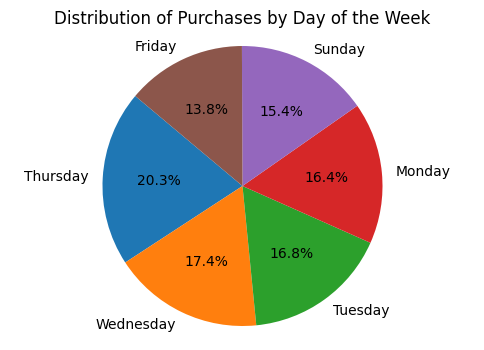

In [83]:
import matplotlib.pyplot as plt

day_counts = df1['Invoice_DayName'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases by Day of the Week')
plt.axis('equal')
plt.show()

#### Plotting a trend chart based on purchases

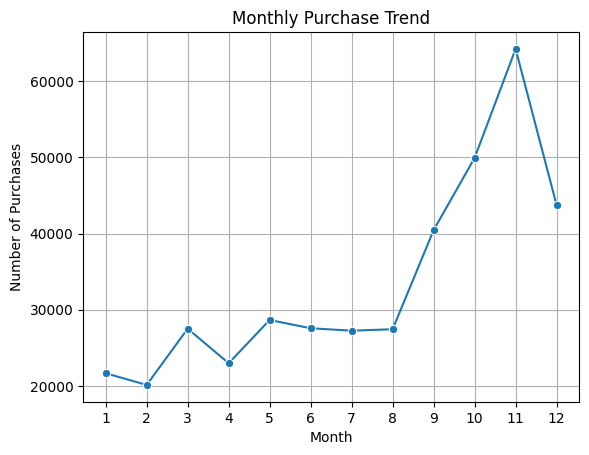

In [84]:
monthly_purchases = df1['Invoice_Month'].value_counts().sort_index()
sns.lineplot(x=monthly_purchases.index, y=monthly_purchases.values, marker='o')
plt.title('Monthly Purchase Trend')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(monthly_purchases.index)
plt.grid()
plt.show()

#### Plotting bar plot of the purchase done on hourly basis

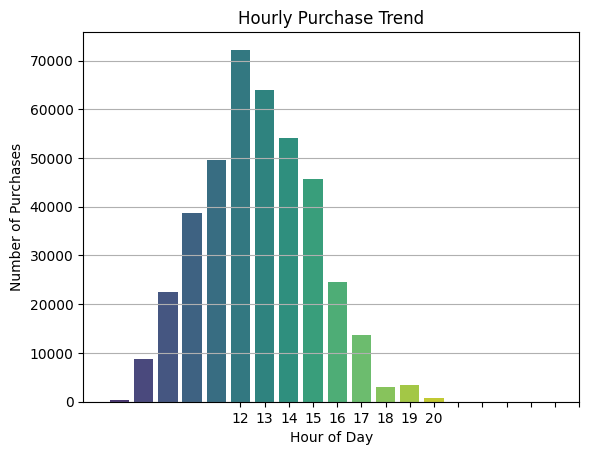

In [86]:
hourly_purchases = df1['Invoice_Hour'].value_counts().sort_index()
sns.barplot(x=hourly_purchases.index, y=hourly_purchases.values,palette='viridis')
plt.title('Hourly Purchase Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.xticks(hourly_purchases.index)
plt.grid(axis='y')  
plt.show()

The number of transactions peaks in afternoon and is highest at 12 PM.

#### Calculating average purchase days for each customer

In [55]:
df1.sort_values(by=['CustomerID', 'InvoiceDate'], inplace=True)
df1['Days_Between_Purchases'] = df1.groupby('CustomerID')['InvoiceDate'].diff().dt.days
average_days = df1.groupby('CustomerID')['Days_Between_Purchases'].mean().reset_index()
average_days.rename(columns={'Days_Between_Purchases': 'Average_Days_Between_Purchases'}, inplace=True)

In [56]:
print(average_days.head())

   CustomerID  Average_Days_Between_Purchases
0     12346.0                             0.0
1     12347.0                             2.0
2     12348.0                             9.4
3     12349.0                             0.0
4     12350.0                             0.0


In [57]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,Invoice_Minute,TransactionType,Is_FreeItem,Invoice_Week,Invoice_DayName,Days_Between_Purchases
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,10,1,Purchase Transaction,No,3,Tuesday,NaN
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,10,17,Return Transaction,No,3,Tuesday,0.0
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,14,57,Purchase Transaction,No,49,Tuesday,NaN
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,14,57,Purchase Transaction,No,49,Tuesday,0.0
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,14,57,Purchase Transaction,No,49,Tuesday,0.0


In [58]:
df1['Days_Between_Purchases'].value_counts()

0.0      382632
6.0         612
7.0         552
1.0         532
4.0         505
          ...  
304.0         1
290.0         1
282.0         1
264.0         1
284.0         1
Name: Days_Between_Purchases, Length: 334, dtype: int64

In [62]:
df2 = df1.copy()

### RFM Analysis

In [63]:
# Creating a reference date for recency calculation

reference_date = df2['InvoiceDate'].max()

In [64]:
# Calculating Recency

rfm = df2.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
                                    'InvoiceNo': 'count',  # Frequency
                                    'UnitPrice': 'sum'  # Monetary
                                   }).reset_index()

In [65]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [66]:
df2 = df2.merge(rfm, on='CustomerID', how='left', suffixes=('', '_RFM'))
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,...,Invoice_Hour,Invoice_Minute,TransactionType,Is_FreeItem,Invoice_Week,Invoice_DayName,Days_Between_Purchases,Recency,Frequency,Monetary
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,...,10,1,Purchase Transaction,No,3,Tuesday,NaN,325,2,2.08
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,...,10,17,Return Transaction,No,3,Tuesday,0.0,325,2,2.08
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,...,14,57,Purchase Transaction,No,49,Tuesday,NaN,1,182,481.21
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,...,14,57,Purchase Transaction,No,49,Tuesday,0.0,1,182,481.21
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,...,14,57,Purchase Transaction,No,49,Tuesday,0.0,1,182,481.21


In [67]:
### Assigning RFM Scores

In [68]:
def rfm_score(value, quantiles):
    if value <= quantiles[0.2]:
        return 5
    elif value <= quantiles[0.4]:
        return 4
    elif value <= quantiles[0.6]:
        return 3
    elif value <= quantiles[0.8]:
        return 2
    else:
        return 1

In [74]:
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()


df2['R'] = df2['Recency'].apply(rfm_score, args=(quantiles['Recency'],))
df2['F'] = df2['Frequency'].apply(rfm_score, args=(quantiles['Frequency'],))
df2['M'] = df2['Monetary'].apply(rfm_score, args=(quantiles['Monetary'],))

df2['RFM_Score'] = df2['R'] + df2['F'] + df2['M']

def segment_rfm(score):
    if score >= 9:
        return 'Best Customers'
    elif score >= 7:
        return 'Loyal Customers'
    elif score >= 5:
        return 'Potential Loyalist'
    else:
        return 'At Risk'

df2['Segment'] = df2['RFM_Score'].apply(segment_rfm)

In [75]:
print(df2[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment']].head())

   CustomerID  Recency  Frequency  Monetary  RFM_Score          Segment
0     12346.0      325          2      2.08         11   Best Customers
1     12346.0      325          2      2.08         11   Best Customers
2     12347.0        1        182    481.21          7  Loyal Customers
3     12347.0        1        182    481.21          7  Loyal Customers
4     12347.0        1        182    481.21          7  Loyal Customers


In [76]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,...,Invoice_DayName,Days_Between_Purchases,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,...,Tuesday,NaN,325,2,2.08,1,5,5,11,Best Customers
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,...,Tuesday,0.0,325,2,2.08,1,5,5,11,Best Customers
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,...,Tuesday,NaN,1,182,481.21,5,1,1,7,Loyal Customers
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,...,Tuesday,0.0,1,182,481.21,5,1,1,7,Loyal Customers
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,...,Tuesday,0.0,1,182,481.21,5,1,1,7,Loyal Customers


In [77]:
df2['Segment'].value_counts()

Loyal Customers       213799
Potential Loyalist    108957
Best Customers         65492
At Risk                13356
Name: Segment, dtype: int64

As per our analysis the number of customers classfied as Loyal Customers are highest while At Risk are lowest which is a good sign for the business

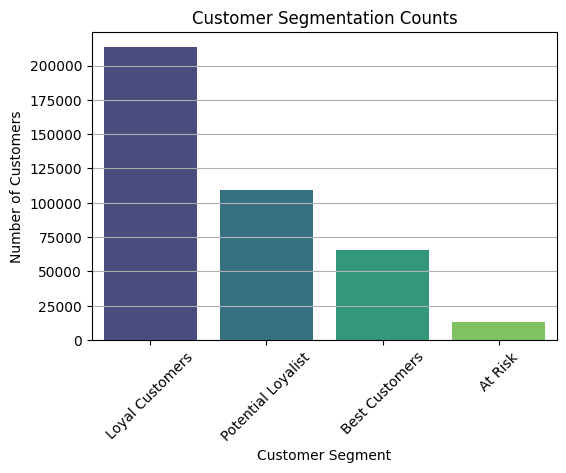

In [89]:
segment_counts = df2['Segment'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Segmentation Counts')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

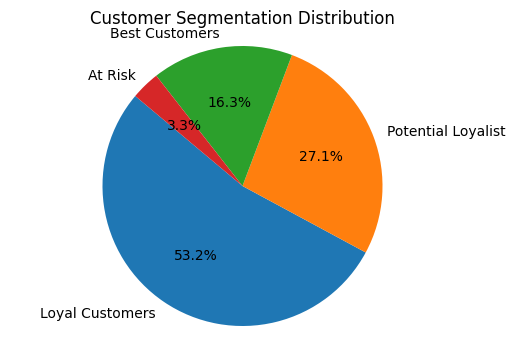

In [93]:
plt.figure(figsize=(6, 4))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segmentation Distribution')
plt.axis('equal') 
plt.show()

### Insights

<ul>
<li>The most frequently occurring Description is 'WHITE HANGING HEART T-LIGHT HOLDER'</li>
<li>Customers are majorly from United Kingdom</li>
<li>The mean quantity purchased is 9.55 while mean unit price of the items are 4.61</li>
<li>There are only 40 free items which is less than 1% of total items</li>
    <li>There are 9288 invoices which has status as cancellation. There are total of 8872 Return transactions which indicates 2.2% of the total transactions.</li>
    <li>There are no transactions happening on Saturday. The number of transactions are highest on Thursday. Also, the number of transactions are highest during last Quarter which is the highest in the year November, followed by October.</li>
    <li>As per our CRM Analysis, Loyal customers accounts for 53.2% and 27.1% under Potential Loyalists which is a good indicator. 'At risk' customers are 3.3% which is also a good sign for the business.</li>
</ul>

### Recommendations

<ul>
<li>Promote Best-Selling Products: Given that the most frequently occurring item is the "WHITE HANGING HEART T-LIGHT HOLDER," consider running targeted marketing campaigns that promote this product. Highlight its features and benefits to encourage both repeat purchases and new customers.</li>
<li>Increase Customer Engagement: With 53.2% of customers classified as loyal, create engagement strategies to further cultivate this segment. Consider loyalty programs, exclusive discounts, or personalized recommendations based on past purchases to maintain their interest and encourage repeat purchases.</li>
<li>Address Cancellation and Return Rates: Analyze the reasons behind the 9,288 canceled invoices and 8,872 return transactions (2.2% of total). Implement quality control measures, enhance product descriptions, and provide clear return policies to reduce these rates. Addressing customer feedback can also lead to product improvements.</li>
<li>Capitalize on Peak Days: Given that Thursday sees the highest transaction volume, consider running special promotions or flash sales specifically on that day. Additionally, analyze the lack of transactions on Saturdays to explore if introducing weekend promotions could capture more sales.</li>
    <li>Target Potential Loyalists: Since 27.1% of customers fall into the "Potential Loyalist" category, focus on converting them into loyal customers. This could involve personalized email campaigns, exclusive previews of new products, or inviting them to special events.</li>
    <li>Monitor 'At Risk' Customers: With 3.3% of customers identified as 'At Risk', proactively reach out to these customers with re-engagement strategies, such as personalized discounts or surveys to understand their needs and improve their experience.</li>
</ul>